In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [12]:
unique_companies = data['Company Name'].nunique()
print("1. How many different companies are represented in the data set?")
print("1. Answer: ", unique_companies)

1. How many different companies are represented in the data set?
1. Answer:  439


In [29]:
jobs_created_queens = int(data[data['City'].str.contains('Queens')]['Job created'].sum())
print("2. What is the total number of jobs created for businesses in Queens?")
print("2. Answer: ", jobs_created_queens)

2. What is the total number of jobs created for businesses in Queens?
2. Answer:  90


In [13]:
unique_emails = data['company email'].nunique()
print("3. How many different unique email domains names are there in the data set?")
print("3. Answer: ", unique_emails)

3. How many different unique email domains names are there in the data set?
3. Answer:  420


In [101]:
filtered_data = data.groupby('NTA').filter(lambda x: len(x['Company Name'].unique()) >=5)
average_total_savings = filtered_data['Total Savings'].mean()
total_jobs_created = int(filtered_data['Job created'].sum())
print("4. Considering only NTAs with at least 5 listed businesses, what is the average total savings for each NTA?")
print("4. Answer: ", average_total_savings)
print("4. Considering only NTAs with at least 5 listed businesses, what is the total jobs created for each NTA?")
print("4. Answer: ", total_jobs_created)

4. Considering only NTAs with at least 5 listed businesses, what is the average total savings for each NTA?
4. Answer:  36355.988137254906
4. Considering only NTAs with at least 5 listed businesses, what is the total jobs created for each NTA?
4. Answer:  79


In [44]:
answers_df = pd.DataFrame({
    "answer_for": [1, 2, 3, 4, 4],
    "question": [
        "How many different companies are represented in the data set?",
        "What is the total number of jobs created for businesses in Queens?",
        "How many different unique email domains names are there in the data set?",
        "Considering only NTAs with at least 5 listed businesses, what is the average total savings for each NTA?",
        "Considering only NTAs with at least 5 listed businesses, what is the total jobs created for each NTA?",
    ],
    "answer": [
        unique_companies,
        jobs_created_queens,
        unique_emails,
        average_total_savings,
        total_jobs_created
    ]
})

In [43]:
answers_df.to_csv("milestone_day4_answers.csv")

Text(0.5, 1.0, 'NTAs with at least 5 businesses')

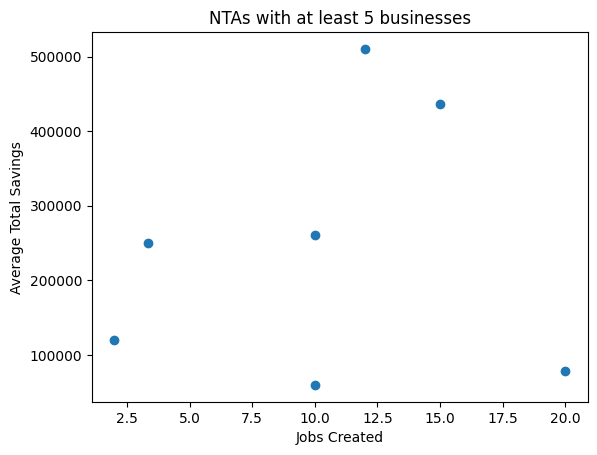

In [102]:
agg_df = filtered_data.groupby('NTA').agg({'Job created': 'mean', 'Total Savings': 'sum'}).dropna()
plt.scatter(agg_df['Job created'], agg_df['Total Savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings')
plt.title('NTAs with at least 5 businesses')

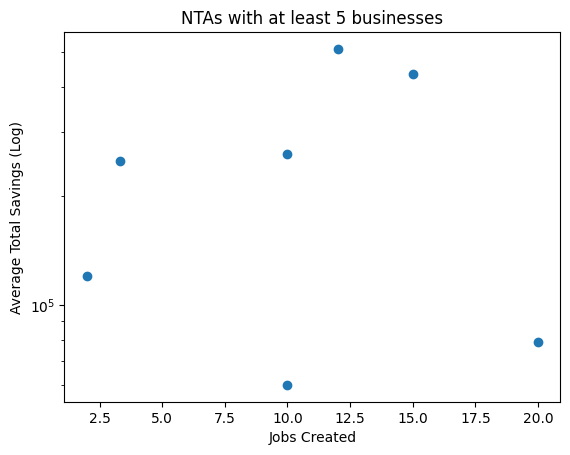

In [76]:
plt.scatter(agg_df['Job created'], agg_df['Total Savings'])
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings (Log)')
plt.title('NTAs with at least 5 businesses')
plt.yscale('log')

Text(0.5, 1.0, 'Average Total Savings for NTAs with at least 5 businesses')

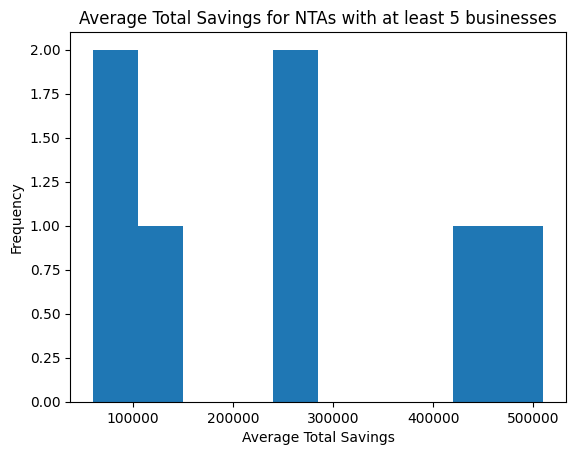

In [79]:
plt.hist(agg_df['Total Savings'])
plt.xlabel('Average Total Savings')
plt.ylabel('Frequency')
plt.title('Average Total Savings for NTAs with at least 5 businesses')

Text(0.5, 1.0, 'Monthly Jobs Created for NTAs with at least 5 businesses')

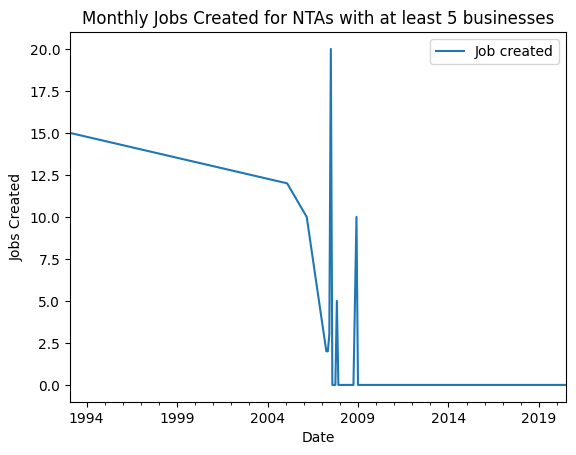

In [103]:
jobs_monthly = filtered_data.groupby(pd.to_datetime(filtered_data['Effective Date']).dt.to_period('M')).agg({'Job created': 'sum'})
jobs_monthly.plot()
plt.xlabel('Date')
plt.ylabel('Jobs Created')
plt.title('Monthly Jobs Created for NTAs with at least 5 businesses')